<a href="https://colab.research.google.com/github/vgvleo/EDAs-An-lise-Explorat-ria-de-Dados-/blob/main/Analisando_Gargalos_Operacionais_no_Setor_Log%C3%ADstico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uma empresa de e-commerce está enfrentando desafios com a pontualidade das entregas. Embora a empresa tenha uma alta demanda de pedidos, a satisfação dos clientes está diminuindo devido a atrasos frequentes. A empresa deseja identificar e entender os fatores que estão causando esses atrasos para melhorar o desempenho logístico e aumentar a satisfação dos clientes.

# Questões a Serem Investigadas:

**Variação do Tempo de Entrega:**


*   Como o tempo médio de entrega varia ao longo dos meses?
*   Existem períodos específicos (como festas de fim de ano) onde o tempo de entrega é consistentemente mais alto?


**Taxa de Atrasos:**



*   Como a quantidade de pedidos atrasados varia ao longo do tempo?
*  Há um aumento nos pedidos atrasados em determinadas épocas do ano ou em determinados dias da semana?

**Impacto das Causas dos Atrasos:**


*   Se as causas dos atrasos estão disponíveis, como essas causas impactam o tempo de entrega e a taxa de atrasos?
*   Quais são as causas mais comuns e como elas podem ser mitigadas?









In [2]:
#Vamos importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Criando um conjunto de dados fictício para exemplificar o estudo

In [3]:
# Gerar dados fictícios
np.random.seed(42)

# Gerar datas
datas_pedido = pd.date_range(start='2023-01-01', end='2023-12-31', periods=500)

# Definir transportadoras
transportadoras = ['Transportadora A', 'Transportadora B', 'Transportadora C']

# Definir regiões de entrega
regioes = ['Norte', 'Sul', 'Leste', 'Oeste', 'Centro']

# Definir categorias de produto
categorias = ['Eletrônicos', 'Roupas', 'Móveis', 'Cosméticos', 'Livros']

# Criar dataset
df = pd.DataFrame({
    'ID Pedido': np.arange(1, 501),
    'Data Pedido': datas_pedido,
    'Data Estimada Entrega': datas_pedido + pd.to_timedelta(np.random.randint(3, 10, size=500), unit='d'),
    'Data Real Entrega': datas_pedido + pd.to_timedelta(np.random.randint(2, 15, size=500), unit='d'),
    'Transportadora': np.random.choice(transportadoras, size=500),
    'Regiao': np.random.choice(regioes, size=500),
    'Categoria Produto': np.random.choice(categorias, size=500)
})

# Calcular atraso (se positivo, há atraso)
df['Atraso (dias)'] = (df['Data Real Entrega'] - df['Data Estimada Entrega']).dt.days
df['Status Entrega'] = np.where(df['Atraso (dias)'] > 0, 'Atrasado', 'No Prazo')

# Visualizar o dataset
df.head()

,ID Pedido,Data Pedido,Data Estimada Entrega,Data Real Entrega,Transportadora,Regiao,Categoria Produto,Atraso (dias),Status Entrega
0,1,2023-01-01 00:00:00.000000000,2023-01-10 00:00:00.000000000,2023-01-08 00:00:00.000000000,Transportadora A,Sul,Móveis,-2,No Prazo
1,2,2023-01-01 17:30:25.250501002,2023-01-07 17:30:25.250501002,2023-01-13 17:30:25.250501002,Transportadora B,Leste,Móveis,6,Atrasado
2,3,2023-01-02 11:00:50.501002004,2023-01-09 11:00:50.501002004,2023-01-15 11:00:50.501002004,Transportadora C,Norte,Cosméticos,6,Atrasado
3,4,2023-01-03 04:31:15.751503006,2023-01-12 04:31:15.751503006,2023-01-09 04:31:15.751503006,Transportadora C,Sul,Cosméticos,-3,No Prazo
4,5,2023-01-03 22:01:41.002004008,2023-01-08 22:01:41.002004008,2023-01-05 22:01:41.002004008,Transportadora A,Leste,Roupas,-3,No Prazo


Como o dataset foi criado, não há necessidade de realizar tratamentos para só então começarmos analisar. (O que é necessário na maioria das vezes hehe)

Então vamos começar a interpretrar os dados. Qual a melhor forma de fazer isso? Fazendo perguntas que direcionam nossa atenção para informações importantes.

# Questão 1: Variação do Tempo de Entrega

**Objetivo**: Analisar como o tempo médio de entrega varia ao longo dos meses e identificar possíveis padrões relacionados a períodos do ano, como festas de fim de ano.

Cálculo do Tempo Médio de Entrega por Mês:
Aqui calculamos a média de dias entre o pedido e a entrega real.

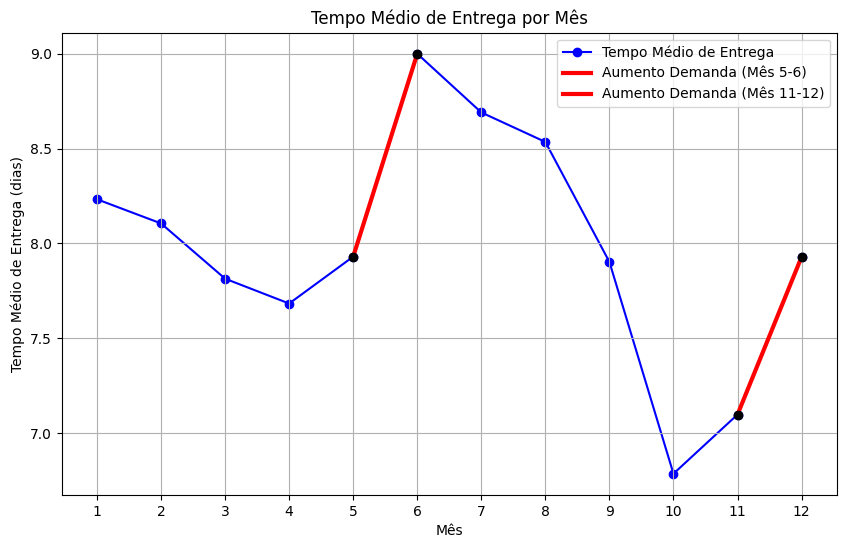

In [11]:
# Criar uma nova coluna com o mês do pedido
df['Mes'] = df['Data Pedido'].dt.month

# Calcular o tempo total de entrega
df['Tempo Entrega'] = (df['Data Real Entrega'] - df['Data Pedido']).dt.days

# Calcular a média de entrega por mês
media_tempo_entrega = df.groupby('Mes')['Tempo Entrega'].mean()

# Visualizar o tempo médio de entrega por mês
#print(media_tempo_entrega)

# Plotar um gráfico de linhas para visualizar a variação ao longo dos meses
plt.figure(figsize=(10,6))

# Plotar linha principal para todos os meses (exceto os intervalos destacados)
plt.plot(media_tempo_entrega.index, media_tempo_entrega.values, marker='o', color='b', label='Tempo Médio de Entrega', zorder=1)

# Destacar aumento do mês 5 para 6
plt.plot([5, 6], [media_tempo_entrega.loc[5], media_tempo_entrega.loc[6]], color='red', linewidth=3, label='Aumento Demanda (Mês 5-6)', zorder=2)

# Destacar aumento do mês 11 para 12
plt.plot([11, 12], [media_tempo_entrega.loc[11], media_tempo_entrega.loc[12]], color='red', linewidth=3, label='Aumento Demanda (Mês 11-12)', zorder=2)

# Adicionar os pontos individuais de maio, junho, novembro e dezembro para destacar
plt.scatter([5, 6, 11, 12],
            [media_tempo_entrega.loc[5], media_tempo_entrega.loc[6], media_tempo_entrega.loc[11], media_tempo_entrega.loc[12]],
            color='black', zorder=3)

# Adicionar título e rótulos
plt.title('Tempo Médio de Entrega por Mês')
plt.xlabel('Mês')
plt.ylabel('Tempo Médio de Entrega (dias)')
plt.grid(True)
plt.xticks(np.arange(1, 13, 1))  # Colocar os meses no eixo X

# Adicionar legenda
plt.legend()

# Mostrar gráfico
plt.show()



# Interpretação: Questão 1
**Aumento de maio para junho**: A linha laranja destaca esse intervalo, o que pode indicar um efeito sazonal, como aumento no tempo de entrega devido a eventos como festas juninas e o início das férias escolares.

**Aumento de novembro para dezembro**: A linha vermelha destaca o impacto das festas de fim de ano e o aumento da demanda no comércio eletrônico (como Black Friday e Natal).

# Questão 2.1: Taxa de Atrasos
**Objetivo**: Analisar como a quantidade de pedidos atrasados varia ao longo do tempo e se há padrões que indiquem aumento em períodos específicos, como em certos dias da semana ou meses.

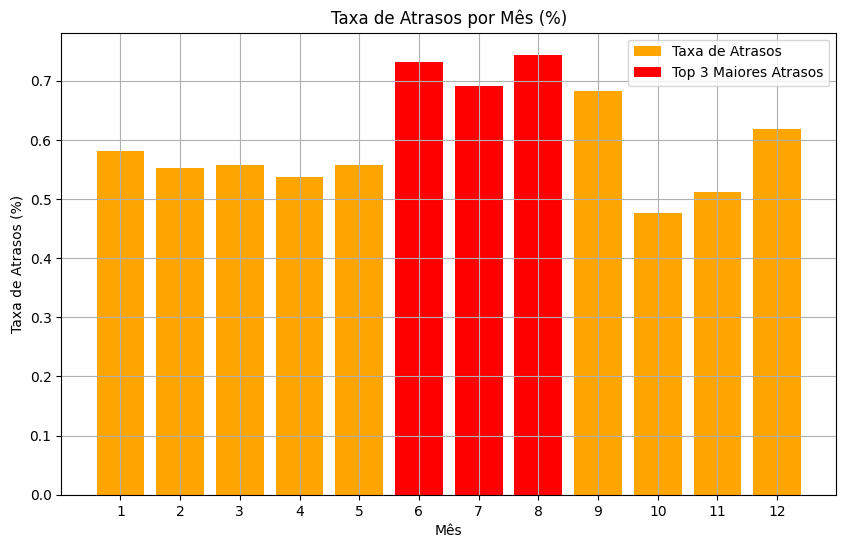

In [14]:
# Calcular a quantidade de pedidos atrasados por mês
taxa_atrasos_por_mes = df.groupby('Mes')['Status Entrega'].apply(lambda x: (x == 'Atrasado').mean())

# Visualizar a taxa de atrasos por mês
#print(taxa_atrasos_por_mes)

# Encontrar os três meses com as maiores taxas de atraso
top_3_meses_atraso = taxa_atrasos_por_mes.nlargest(3)

# Plotar um gráfico de barras para visualizar a variação ao longo dos meses
plt.figure(figsize=(10,6))

# Plotar todas as barras
plt.bar(taxa_atrasos_por_mes.index, taxa_atrasos_por_mes.values, color='orange', label='Taxa de Atrasos')

# Destacar os três meses com as maiores taxas de atraso
plt.bar(top_3_meses_atraso.index, top_3_meses_atraso.values, color='red', label='Top 3 Maiores Atrasos')

# Adicionar título e rótulos
plt.title('Taxa de Atrasos por Mês (%)')
plt.xlabel('Mês')
plt.ylabel('Taxa de Atrasos (%)')
plt.xticks(np.arange(1, 13, 1))  # Colocar os meses no eixo X
plt.grid(True)

# Adicionar legenda
plt.legend()

# Mostrar gráfico
plt.show()



# Interpretação: Questão 2.1

**Taxa de Atrasos**: A alta taxa de atrasos indica que, além do aumento no tempo médio de entrega, muitos pedidos estão sendo entregues fora dos prazos acordados. Isso pode ser um reflexo de uma demanda muito superior à capacidade operacional, principalmente nos meses pós-junho.

Essa combinação de aumento no tempo médio de entrega e altas taxas de atraso é um sinal claro de que a empresa está operando no limite de sua capacidade durante certos períodos, exigindo intervenções estratégicas para evitar a insatisfação dos clientes.








# Questão 2.2: Taxa de Atrasos por Dia da Semana

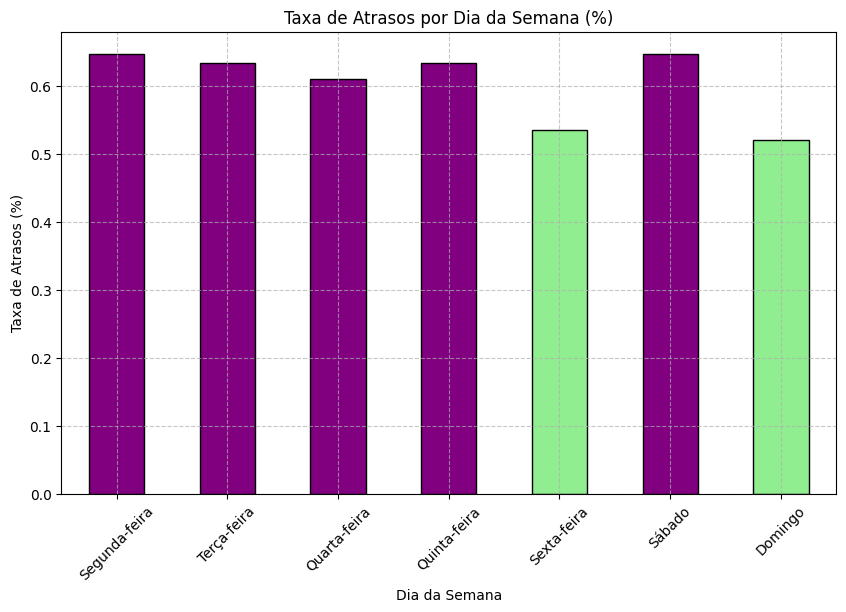

In [18]:
# Criar uma nova coluna com o dia da semana
df['Dia Semana'] = df['Data Pedido'].dt.day_name()

# Mudar os nomes dos dias da semana para português
df['Dia Semana'] = df['Dia Semana'].replace({
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
})

# Calcular a taxa de atrasos por dia da semana
taxa_atrasos_por_dia = df.groupby('Dia Semana')['Status Entrega'].apply(lambda x: (x == 'Atrasado').mean())

# Definir a ordem dos dias da semana
ordem_dias = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']
taxa_atrasos_por_dia = taxa_atrasos_por_dia.reindex(ordem_dias)

# Identificar os dias com menor taxa de atraso
menor_atraso = taxa_atrasos_por_dia.min()
dias_menor_atraso = taxa_atrasos_por_dia[taxa_atrasos_por_dia <= menor_atraso + 0.05]

# Plotar um gráfico de barras para visualizar a variação ao longo dos dias da semana
plt.figure(figsize=(10,6))
ax = taxa_atrasos_por_dia.plot(kind='bar', color='purple', edgecolor='black')

# Destacar os dias com menor taxa de atraso
for dia in dias_menor_atraso.index:
    ax.patches[ordem_dias.index(dia)].set_facecolor('lightgreen')

plt.title('Taxa de Atrasos por Dia da Semana (%)')
plt.xlabel('Dia da Semana')
plt.ylabel('Taxa de Atrasos (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()



# **Interpretação: Questão 2.2**

**Segunda-feira a Quinta-feira**: A maior taxa de atraso durante a semana pode sugerir que o volume de pedidos é mais alto, os processos são mais sobrecarregados ou que existem problemas específicos nesses dias, como dificuldades logísticas, maior tráfego ou problemas de capacidade.

A análise revela que os atrasos são mais pronunciados durante a semana e menores no fim de semana, o que pode ser um indicativo de problemas operacionais que ocorrem durante a semana.

# Questão 3: Impacto das Causas dos Atrasos

 **Objetivo**: Analisar o impacto de diferentes causas de atrasos (se houver) e identificar quais causas são mais recorrentes e como elas afetam o tempo de entrega.

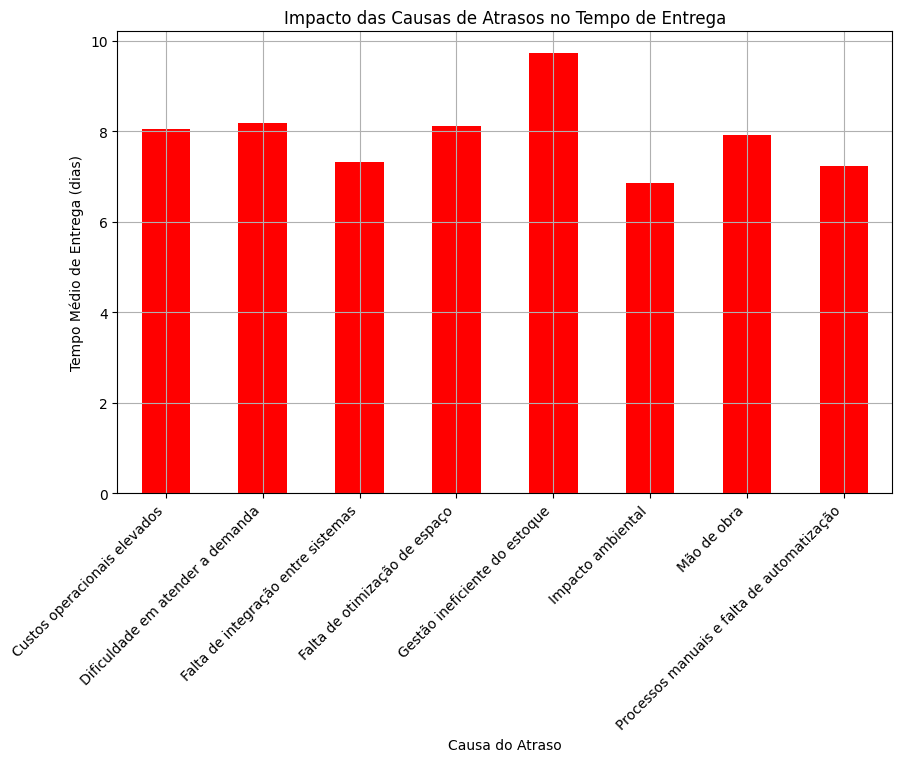

In [29]:
# Adicionar uma coluna fictícia de "Causa do Atraso" com 8 causas
causas_atraso = [
    "Gestão ineficiente do estoque",
    "Falta de otimização de espaço",
    "Processos manuais e falta de automatização",
    "Falta de integração entre sistemas",
    "Mão de obra",
    "Custos operacionais elevados",
    "Dificuldade em atender a demanda",
    "Impacto ambiental"
]
df['Causa Atraso'] = np.where(df['Status Entrega'] == 'Atrasado',
                              np.random.choice(causas_atraso, size=len(df)),
                              'Nenhum')

# Introduzir variação nos tempos de entrega para simular cenários reais
np.random.seed(40)
df['Tempo Entrega'] = np.where(df['Status Entrega'] == 'Atrasado',
                                np.random.randint(2, 15, size=len(df)),
                                np.random.randint(1, 5, size=len(df)))

# Analisar o impacto de cada causa no tempo de entrega
impacto_causas = df[df['Causa Atraso'] != 'Nenhum'].groupby('Causa Atraso')['Tempo Entrega'].mean()

# Visualizar o impacto de cada causa
#print(impacto_causas)

# Plotar um gráfico de barras para mostrar o impacto das causas
plt.figure(figsize=(10,6))
impacto_causas.plot(kind='bar', color='red')
plt.title('Impacto das Causas de Atrasos no Tempo de Entrega')
plt.xlabel('Causa do Atraso')
plt.ylabel('Tempo Médio de Entrega (dias)')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Melhorar a visualização dos rótulos
plt.show()

# Interpretação: Questão 3

**Gestão Ineficiente do Estoque**: Problemas na gestão de estoque resultam em tempos de entrega mais longos devido à falta de produtos disponíveis ou dificuldades em localizar itens no armazém, evidenciado também pelo volume contabilizdo em "Falta de otimização de espaço".



# Conclusão:

Este estudo focou em entender os dados de tempos de entrega e taxas de atraso em um e-commerce, utilizando Estatística Descritiva e Análise Exploratória de Dados (EDA). Através de gráficos e análises estatísticas, identificamos padrões sazonais, dias com menores taxas de atraso e causas dos problemas operacionais.

As visualizações ajudaram a revelar tendências e áreas problemáticas, enquanto a estatística forneceu uma base para entender o impacto desses problemas. Uma boa EDA não só esclarece dados complexos, mas também orienta decisões estratégicas, ajudando a melhorar operações e aumentar a satisfação do cliente.

Em resumo, analisar e visualizar dados de forma eficaz é crucial para identificar gargalos e oportunidades de melhoria, resultando em decisões mais informadas e eficazes.